## Hear Failure analysis

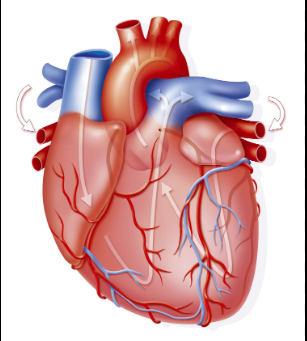

We are going to work with a dataset on heart failure.

The dataset contains medical records of 299 patients who suffered heart failure during a follow-up period.

The 13 clinical characteristics included in the dataset are:

- Age: patient age (years)
- Anemia: decrease in red blood cells or hemoglobin (Boolean)
- High blood pressure: whether the patient has hypertension (boolean)
- Creatinine phosphokinase (CPK): CPK enzyme level in the blood (mcg/L)
- Diabetes: whether the patient has diabetes (boolean)
- Ejection fraction: percentage of blood leaving the heart with each contraction (percentage)
- Platelets: platelets in the blood (kiloplatelets/mL)
- Sex: female or male (binary)
- Serum creatinine: serum creatinine level in the blood (mg/dL)
- Serum sodium: serum sodium level in the blood (mEq/L)
- Smoking: whether the patient smokes or not (boolean)
- Time: follow-up period (days)
- [Objective] Death event: whether the patient died during the follow-up period (Boolean)

## Extract Transform Load

I have a file called ETL.py to automate the process to estract, transform and load data. which is in the same folder as this notebook.
This ETL.py contains the following methods:

- getData
- Transform_data
- load_data

the functionm of this file is to automate the process of gathering the data, transforming it (add new column to age groups and others functions) and loading it in a csv file called <strong>"heart_failure_clean"</strong>.

Beside the ETL.py file needs a argument to pass the url of the dataset trhough the command line.

In [1]:
!python ETL.py https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv

Data gathered successfully
Data transformation started
Outliers eliminated
Age groups created
Data transformation completed
Data loaded successfully, file saved as heart_failure_clean.csv
ETL process completed


## Read the dataset cleaned

In [2]:
import pandas as pd
import numpy as np

In [3]:
#Cargar el dataset
data = pd.read_csv("heart_failure_clean.csv")
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1,Old
1,65.0,0,146,0,20,0,162000.0,1.3,129,1,1,7,1,Old
2,50.0,1,111,0,20,0,210000.0,1.9,137,1,0,7,1,Adult
3,90.0,1,47,0,40,1,204000.0,2.1,132,1,1,8,1,Old
4,75.0,1,246,0,15,0,127000.0,1.2,137,1,0,10,1,Old


## Simples Analytics

In [4]:
# Calcular el promedio de edad
age_array = np.array(data["age"])
mean_age = np.mean(age_array)
print(f"The mean age in this study was: {mean_age}")

The mean age in this study was: 60.80952678571428


In [5]:
#Calculate the mean age of dead patients
df_is_dead = data.query('DEATH_EVENT == 1')
df_not_dead = data.query('DEATH_EVENT == 0')
mean_age_dead = df_is_dead["age"].mean()
print(f"The mean age of dead patients was: {mean_age_dead}")

The mean age of dead patients was: 66.30601639344262


In [6]:
#Calculate the mean age of not dead patients
mean_age_not_dead = df_not_dead["age"].mean()
print(f"The mean age of not-dead patients was: {mean_age_not_dead}")

The mean age of not-dead patients was: 58.75255828220858


In [7]:
#calculate the amount of smoker men and smoker women
SmokerManVsWoman = data.query('smoking == 1').groupby('sex').count()['age']
print(f"The number of smoking men was: {SmokerManVsWoman[1]} | The number of smoking women was:: {SmokerManVsWoman[0]}")

The number of smoking men was: 70 | The number of smoking women was:: 2


### First conclution:
    Age is a variable that can significantly increase heart attacks

# Graphical Analysis

Once we have the data exported by our ETL script, we can proceed to make analysis graphs.

1. Plot the age distribution of the patients using a histogram.

In [8]:
import matplotlib.pyplot as plt

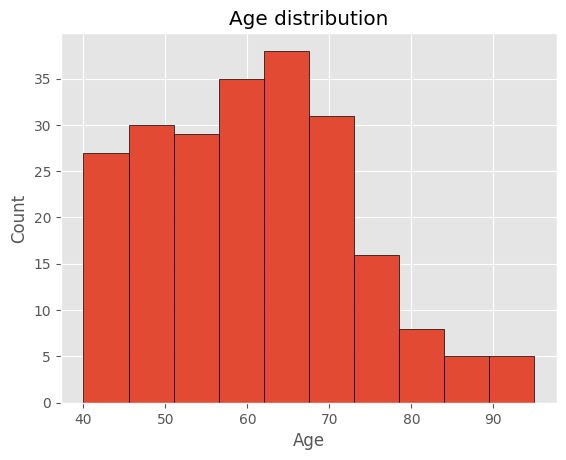

In [9]:
age_df = data["age"]
plt.style.use('ggplot')
plt.hist(age_df, edgecolor = 'black')
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

2. Plot a histogram grouping by sex.
    - Count the number of anemic patients
    - Count the number of diabetic patients
    - Count the number of patients who smoke
    - Count the number of patients who were dead    

In [10]:
dataBySex = data.groupby('sex').sum()[['anaemia', 'diabetes', 'smoking', 'DEATH_EVENT']]
dataBySex

,anaemia,diabetes,smoking,DEATH_EVENT
sex,,,,
0,43,41,2,20
1,62,53,70,41


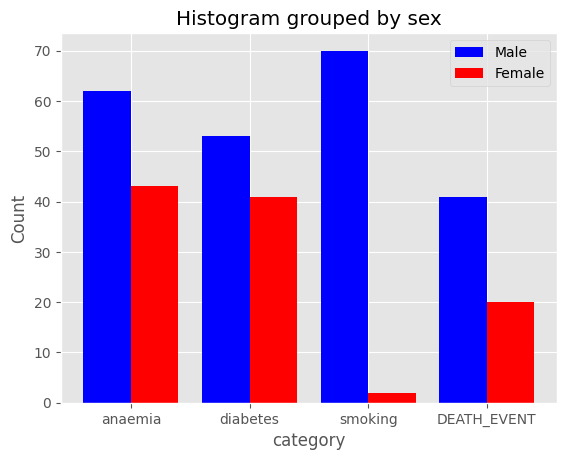

In [11]:
N=4
width = 0.4
plt.bar(np.arange(N),dataBySex.iloc[1], width=width, color='b', label='Male')
plt.bar(np.arange(N) + width,dataBySex.iloc[0], width=width, color='r', label='Female')
plt.legend()
plt.xticks(np.arange(N) + width / 2, dataBySex.columns)
plt.title('Histogram grouped by sex')
plt.xlabel('category')
plt.ylabel('Count')
plt.show()

## Plots a subplot to count the percentage of patients by:
- anemic patients
- diabetic patients
- patients who smoke
- patients who died

In [12]:
PatientsByAnaemia = data.replace({0: 'No', 1: 'Yes'}).groupby('anaemia').count()['age']
PatientsByDiabetes = data.replace({0: 'No', 1: 'Yes'}).groupby('diabetes').count()['age']
PatientsBySmoking = data.replace({0: 'No', 1: 'Yes'}).groupby('smoking').count()['age']
PatientsByDeath = data.replace({0: 'No', 1: 'Yes'}).groupby('DEATH_EVENT').count()['age']

<Figure size 640x480 with 0 Axes>

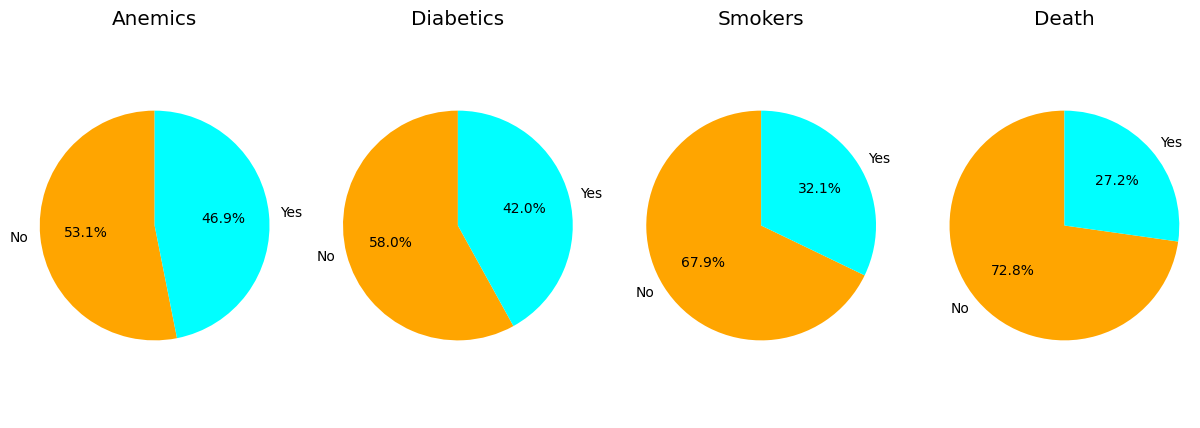

In [13]:
fig = plt.figure()
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
PatientsGroup = {
    'Anemics': PatientsByAnaemia,
    'Diabetics': PatientsByDiabetes,
    'Smokers': PatientsBySmoking,
    'Death': PatientsByDeath
}
colors =['orange', 'cyan']

for i, (key, value) in enumerate(PatientsGroup.items()):
    ax[i].pie(
        value,
        labels=value.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90
        )
    ax[i].set_title(key)
    ax[i].axis('equal')

## Dimensionality reduction and 3D graphing

In [14]:
#Filter for X, which is the data without age_group and death_event
#Filter for y, which is the data with death_event

X = data.drop(['DEATH_EVENT', 'age_group'], axis=1).to_numpy()
y = data['DEATH_EVENT'].to_numpy()
X,y

(array([[ 75.,   0., 582., ...,   1.,   0.,   4.],
        [ 65.,   0., 146., ...,   1.,   1.,   7.],
        [ 50.,   1., 111., ...,   1.,   0.,   7.],
        ...,
        [ 63.,   1., 103., ...,   1.,   1., 270.],
        [ 62.,   0.,  61., ...,   1.,   1., 270.],
        [ 50.,   0., 196., ...,   1.,   1., 285.]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0,

In [15]:
from sklearn.manifold import TSNE  #T-Distributed Stochastic Neighbor Embedding | reduces the dimensionality of the data

X_embedded = TSNE(
    n_components=3,
    learning_rate='auto',
    init='random',
    perplexity=3
).fit_transform(X)

In [16]:
print(f'data shape before t-SNE: {X.shape} | data shape after t-SNE: {X_embedded.shape}')

data shape before t-SNE: (224, 12) | data shape after t-SNE: (224, 3)


Make a 3D scatter plot with Plotly where the points of each class (alive or dead) have an assigned color in order to differentiate them. (For this you must use the vector y)

In [17]:
import plotly.graph_objects as go
fig = go.Figure()

In [18]:
fig.data = ()
fig.add_trace(
    go.Scatter3d(
        x=X_embedded[:, 0],
        y=X_embedded[:, 1],
        z=X_embedded[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=y,
            opacity=0.8,
            colorscale='Viridis',
            colorbar=dict(title='Death Event')
        )
    )
)

fig.update_layout(
    title='t-SNE'
)

fig.show()

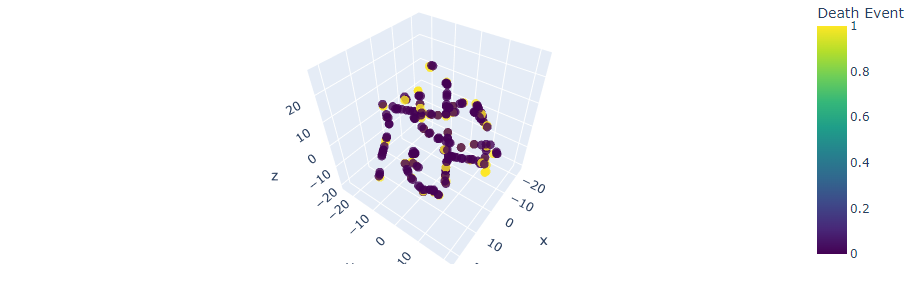

## Predicting with machine learning model (tree classifier) the column 'DEATH_EVENT'

1. plot the class distribution to see if there is a class imbalance

Text(0, 0.5, 'Count')

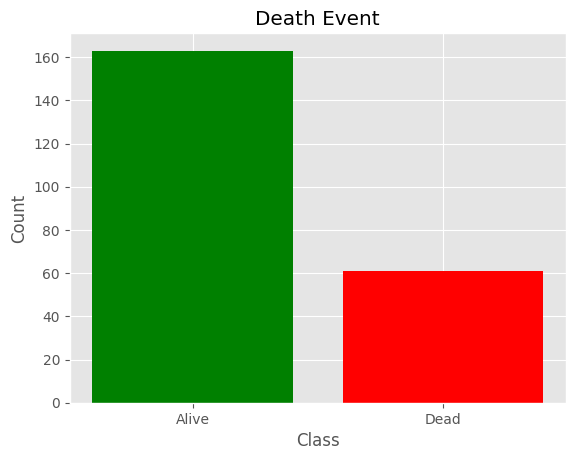

In [32]:
class_labels =['Alive', 'Dead']
plt.bar(class_labels, PatientsByDeath, color=['green', 'red'])
plt.title('Death Event')
plt.xlabel('Class')
plt.ylabel('Count')

The class is not balanced, due to the small amount of patients who died.
We must stratify y in order to have a balanced dataset.

2. split the data into train and test sets
    - This split must be stratified in order to have a balanced dataset

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

3. Create a DecisionTreeClassifier model and fit it using the training data
    - calculate the accuracy of the model

In [58]:
from sklearn.tree import DecisionTreeClassifier
treeModel = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, random_state=42)
treeModel.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, random_state=42)

In [61]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, treeModel.predict(X_test))
print(f'The accuracy of the model is: {accuracy}')

The accuracy of the model is: 0.8444444444444444


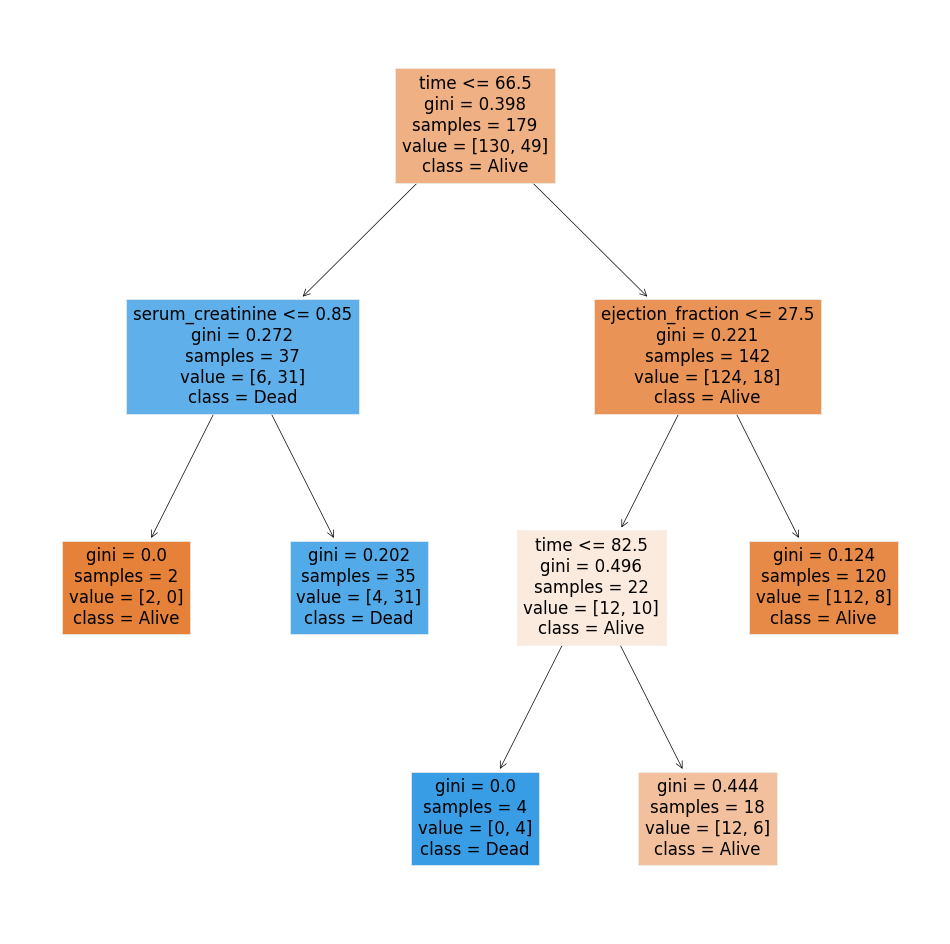

In [60]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(12, 12))
tree.plot_tree(treeModel, filled=True, feature_names=list(data.columns[:-2]), class_names=class_labels, ax=ax)
plt.show()